In [ ]:
import pandas as pd

In [ ]:
# Attempting to load and merge the files again with a more granular approach

# Load the files one by one
df1 = pd.read_csv('/content/traffic_data_20240917_185639_204a2503-d8a2-4c14-aefe-0acf4a61cc14.csv')
df2 = pd.read_csv('/content/traffic_data_20240917_201916_b9c0a8c9-0855-40f1-bc12-1be60dd42f27.csv')
df3 = pd.read_csv('/content/traffic_data_20240917_210306_56fcdd63-a33d-4964-b3ea-11a87603ef80.csv')
df4 = pd.read_csv('/content/traffic_data_20240917_214545_32b0dc36-07de-4a52-9ef6-dc13ba95fe28.csv')
df5 = pd.read_csv('/content/traffic_data_20240917_230234_6583ffb0-f353-4ed0-aee1-8a52d424ccef.csv')
df6 = pd.read_csv('/content/traffic_data_20240918_001359_706bfe5e-187d-4291-89b6-8039f4adefd5.csv')
df7 = pd.read_csv('/content/traffic_data_20240918_074818_d7dfef34-3ab1-45bb-9279-3d738396795e.csv')
df8 = pd.read_csv('/content/traffic_data_20240918_131538_1aad3567-0967-4343-9d07-fe9c40703ae4.csv')
df9 = pd.read_csv('/content/traffic_data_20240918_171831_fad6e4df-f7b7-423a-bee6-560c7a190ef3.csv')

# Concatenate all dataframes
df1 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True)

# Display the merged dataframe to the user
df1


,road_name,distance_km,duration_in_traffic_min,speed_kmh,delay_min,traffic_condition,timestamp,Start_point,End_point
0,العجلية,0.289,1.700000,10.200000,-0.033333,Blue,2024-09-17T18:54:08.220109,"(24.6345318, 46.6989093)","(24.6332014, 46.6986829)"
1,طريق الأرطاوية أم الجماجم,201.086,117.150000,102.988988,3.483333,Blue,2024-09-17T18:54:08.462213,"(26.8989379, 45.3260035)","(26.866834, 45.3127513)"
2,شارع برودان,352.026,199.383333,105.934431,8.466667,Blue,2024-09-17T18:54:08.727997,"(22.5287906, 45.09149550000001)","(22.5214768, 45.0786209)"
3,القويعية,4.397,10.750000,24.541395,3.616667,Red,2024-09-17T18:54:08.915785,"(24.7586767, 46.70162699999999)","(24.7564578, 46.6969467)"
4,صلبوخ,0.385,1.783333,12.953271,0.000000,Blue,2024-09-17T18:54:09.116434,"(24.5293006, 46.70255179999999)","(24.5263552, 46.7001172)"
...,...,...,...,...,...,...,...,...,...
6231,بيدة,8.496,19.200000,26.550000,0.883333,Blue,2024-09-18T17:18:30.604090,"(24.6137046, 46.6878894)","(24.5886539, 46.6349367)"
6232,عبداللطيف الخيمي,6.273,17.700000,21.264407,8.666667,Red,2024-09-18T17:18:30.781764,"(24.6668921, 46.7040428)","(24.6644876, 46.6998152)"
6233,الحويرة,10.444,16.016667,39.124246,-0.366667,Blue,2024-09-18T17:18:30.949820,"(24.6860722, 46.8153462)","(24.6433178, 46.7776658)"
6234,التوحيد,6.077,7.050000,51.719149,-0.066667,Blue,2024-09-18T17:18:31.114102,"(24.5602792, 46.6204638)","(24.5516396, 46.609009)"


In [ ]:
gd = df1.groupby(['road_name', 'Start_point', 'End_point']).agg({
    'delay_min': 'mean',
    'speed_kmh': 'mean',
    'duration_in_traffic_min': 'mean',
    'distance_km': 'mean',
    'traffic_condition': lambda x: x.mode()[0]  # Take the most frequent traffic condition
}).reset_index()

In [ ]:
gd.head()

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
0,'Al Sabe,"(24.598009, 46.5957488)","(24.5954907, 46.5925096)",1.335185,49.992038,14.209259,11.734222,Blue
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.181481,34.510183,14.681481,8.404000,Yellow
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.020370,48.384365,7.570370,6.094000,Blue
3,5399,"(24.43571510000003, 46.8242555)","(24.38574769999997, 46.62209730000001)",-1.131481,55.430372,41.835185,38.632000,Blue
4,63 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.183333,34.498791,14.683333,8.404000,Yellow


In [ ]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   road_name                693 non-null    object 
 1   Start_point              693 non-null    object 
 2   End_point                693 non-null    object 
 3   delay_min                693 non-null    float64
 4   speed_kmh                693 non-null    float64
 5   duration_in_traffic_min  693 non-null    float64
 6   distance_km              693 non-null    float64
 7   traffic_condition        693 non-null    object 
dtypes: float64(4), object(4)
memory usage: 43.4+ KB


In [ ]:
gd.shape

(693, 8)

In [ ]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   road_name                693 non-null    object 
 1   Start_point              693 non-null    object 
 2   End_point                693 non-null    object 
 3   delay_min                693 non-null    float64
 4   speed_kmh                693 non-null    float64
 5   duration_in_traffic_min  693 non-null    float64
 6   distance_km              693 non-null    float64
 7   traffic_condition        693 non-null    object 
dtypes: float64(4), object(4)
memory usage: 43.4+ KB


In [ ]:
gd.duplicated().sum()

0

In [ ]:
gd.isna().sum()

,0
road_name,0
Start_point,0
End_point,0
delay_min,0
speed_kmh,0
duration_in_traffic_min,0
distance_km,0
traffic_condition,0


In [ ]:
gd[['Start_point','End_point']].duplicated().sum()

254

In [ ]:
gd2 = gd.drop_duplicates(subset=['Start_point','End_point'])

In [ ]:
gd2.head()

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
0,'Al Sabe,"(24.598009, 46.5957488)","(24.5954907, 46.5925096)",1.335185,49.992038,14.209259,11.734222,Blue
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.181481,34.510183,14.681481,8.404000,Yellow
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.020370,48.384365,7.570370,6.094000,Blue
3,5399,"(24.43571510000003, 46.8242555)","(24.38574769999997, 46.62209730000001)",-1.131481,55.430372,41.835185,38.632000,Blue
5,65,"(25.15493010000003, 47.1735343)","(24.29445029999997, 46.42912490000001)",6.842593,74.648912,155.625926,193.541000,Blue


In [ ]:
gd2.shape

(439, 8)

<Axes: xlabel='traffic_condition'>

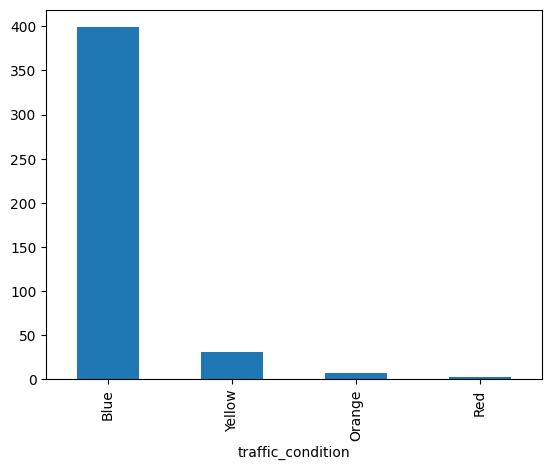

In [ ]:
gd2['traffic_condition'].value_counts().plot(kind = 'bar')

In [ ]:
# Assuming you already have your DataFrame gd2 loaded
# List of columns with numeric data
numeric_columns = ['delay_min', 'speed_kmh', 'duration_in_traffic_min', 'distance_km']

# Round the numeric columns to two decimal places
gd2[numeric_columns] = gd2[numeric_columns].round(2)

# Save the result as new data in a DataFrame called df
df = gd2.copy()



<ipython-input-15-2d7de266fb7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gd2[numeric_columns] = gd2[numeric_columns].round(2)


In [ ]:
df.head()

,road_name,Start_point,End_point,delay_min,speed_kmh,duration_in_traffic_min,distance_km,traffic_condition
0,'Al Sabe,"(24.598009, 46.5957488)","(24.5954907, 46.5925096)",1.34,49.99,14.21,11.73,Blue
1,110 ممر,"(24.594892, 46.6403652)","(24.571468, 46.5812872)",1.18,34.51,14.68,8.40,Yellow
2,3rd Roundabout,"(24.6652373, 46.7968369)","(24.6631823, 46.7870053)",0.02,48.38,7.57,6.09,Blue
3,5399,"(24.43571510000003, 46.8242555)","(24.38574769999997, 46.62209730000001)",-1.13,55.43,41.84,38.63,Blue
5,65,"(25.15493010000003, 47.1735343)","(24.29445029999997, 46.42912490000001)",6.84,74.65,155.63,193.54,Blue


In [ ]:
df.shape

(439, 8)

In [ ]:
# Display the value counts for the 'road_name' column
pd.set_option('display.max_rows', None)
df['road_name'].value_counts()

,count
road_name,
'Al Sabe,1
جلاجل,1
خالد ابن الوليد,1
خارجة بن حذافة,1
حمزة الاركوبي,1
حمد الخطيب,1
حليمة السعدية,1
حلبان,1
حسين بن سعيد المنوفي,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


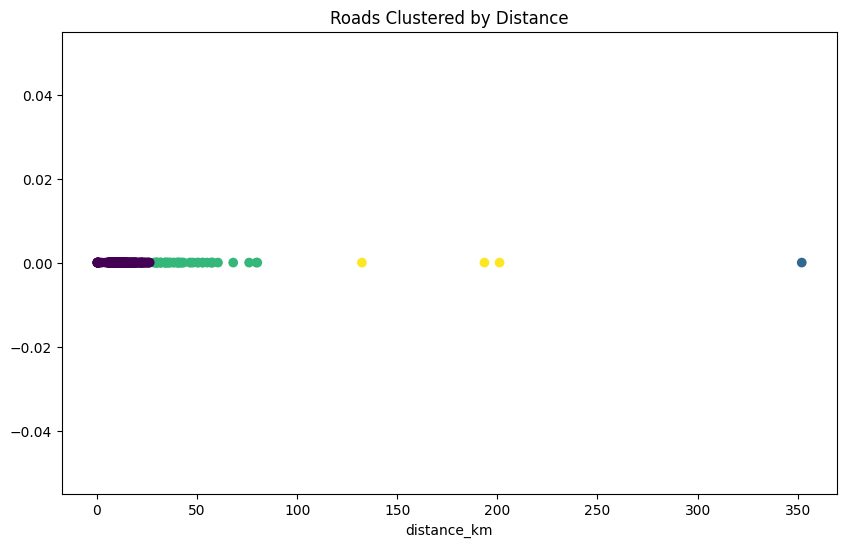

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

X = df[['distance_km']].values

kmeans = KMeans(n_clusters=4, random_state=0)

df['Distance_Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['distance_km'], np.zeros_like(df['distance_km']),
            c=df['Distance_Cluster'], cmap='viridis', label=df['road_name'])
plt.xlabel("distance_km")
plt.title("Roads Clustered by Distance")
plt.show()

In [ ]:
df.to_csv('formatted_traffic_data.csv', index=False)